In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [3]:
races = pd.read_csv("races.csv")

In [4]:
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


In [5]:
pitStops = pd.read_csv("pitStops.csv")
pitStops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
5,841,22,1,13,17:24:29,23.643,23643
6,841,20,1,14,17:25:17,22.603,22603
7,841,814,1,14,17:26:03,24.863,24863
8,841,816,1,14,17:26:50,25.259,25259
9,841,67,1,15,17:27:34,25.342,25342


In [6]:
pitStops['time']

0       17:05:23
1       17:05:52
2       17:20:48
3       17:22:34
4       17:24:10
5       17:24:29
6       17:25:17
7       17:26:03
8       17:26:50
9       17:27:34
10      17:27:41
11      17:28:24
12      17:28:39
13      17:29:00
14      17:29:06
15      17:29:08
16      17:29:49
17      17:30:24
18      17:31:06
19      17:31:11
20      17:32:08
21      17:33:02
22      17:33:53
23      17:40:27
24      17:40:45
25      17:44:29
26      17:46:04
27      17:49:07
28      17:49:47
29      17:51:32
          ...   
6221    14:50:51
6222    15:00:16
6223    15:00:36
6224    15:02:35
6225    15:02:43
6226    15:08:02
6227    15:23:42
6228    15:32:18
6229    17:23:10
6230    17:24:58
6231    17:27:48
6232    17:29:30
6233    17:31:34
6234    17:33:10
6235    17:36:18
6236    17:37:57
6237    17:39:31
6238    17:40:31
6239    17:42:15
6240    17:42:42
6241    17:44:41
6242    17:49:52
6243    17:53:13
6244    17:55:13
6245    17:56:53
6246    17:56:57
6247    17:57:47
6248    17:57:

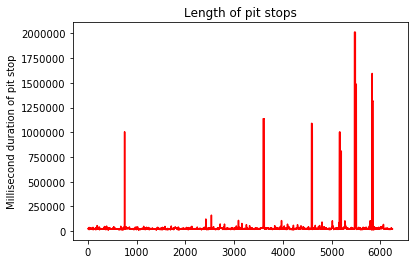

In [7]:
plt.plot(pitStops['milliseconds'], color='red')
plt.ylabel('Millisecond duration of pit stop')
plt.title('Length of pit stops')
plt.show()

In [8]:
"""
This was an introductory plot to get a feel for the data. 
It looks like this particular data would be better represented as a histogram, or by plotting the length vs the race ID
"""

'\nThis was an introductory plot to get a feel for the data. \nIt looks like this particular data would be better represented as a histogram, or by plotting the length vs the race ID\n'

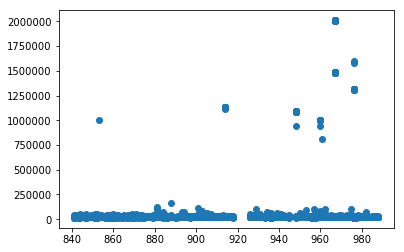

In [9]:
plt.scatter(x=pitStops['raceId'], y=pitStops['milliseconds'])
plt.show()

In [10]:
#It looks like there are a lot of outliers, probably due to major crashes Vs. just refueling and new tires

<function matplotlib.pyplot.show>

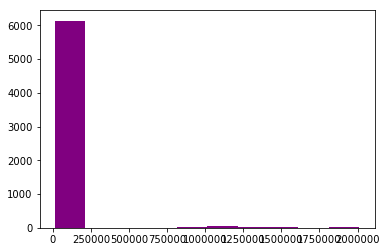

In [11]:
x = pitStops['milliseconds']
plt.hist(x, color='purple')
plt.show

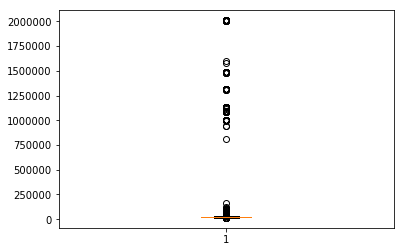

In [20]:
plt.boxplot(pitStops['milliseconds'])
plt.show()

In [ ]:
#Clearly there is a lot of variance in the length of pit stops
#The middle quartiles are quite short but there are a significant number of longer outliers

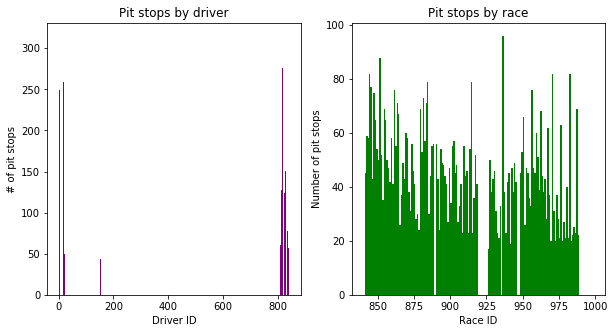

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(pitStops['driverId'], color='purple', bins=1000)
plt.ylabel('# of pit stops')
plt.xlabel('Driver ID')
plt.title('Pit stops by driver')

plt.subplot(1, 2, 2)
plt.hist(pitStops['raceId'], color='green', bins=np.arange(840, 1000))
plt.ylabel('Number of pit stops')
plt.xlabel('Race ID')
plt.title('Pit stops by race')
plt.show()

In [17]:
#Clearly some drivers have to take many more pit stops than others, and some races are more prone to pit stops than others
#This makes sense as cars and drivers are not always the same, and some courses are considered much more difficult than others
#There seem to be a few races in the 900-925 range for which there were no stops, this seems to indicate missing data


In [21]:
#There is a significant amount of work and sorting that could be done with this data.
#The data itself is also part of a much larger set, someone could spend weeks processing all of the different data
#These visuals are just a brief example of what can be done with Matplotlib, and could be refined significantly